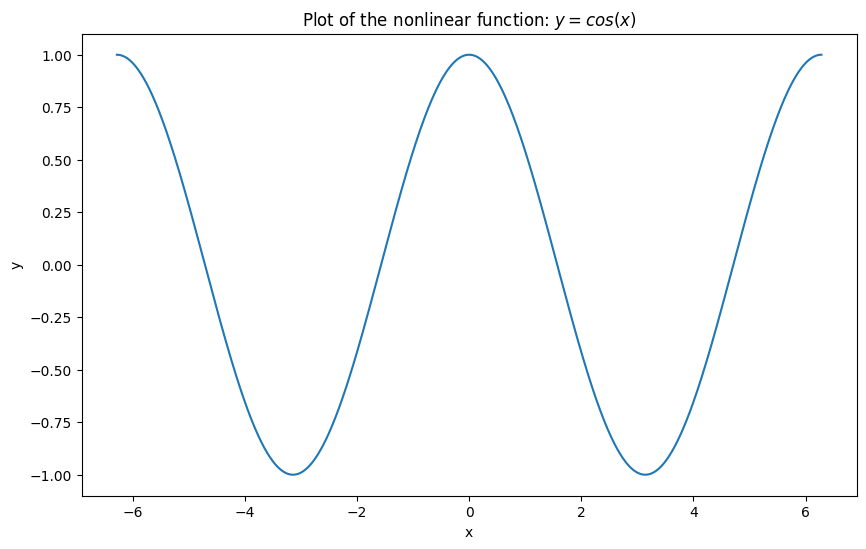

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define the non-linear function (e.g., sine wave with noise)
# def nonlinear_function(x):
#     return np


import numpy as np
def nonlinear_function(x):
    pi=3.14
    return np.cos(x)


# Generate a range of x values
x = np.linspace(-2*np.pi, 2*np.pi, 1000)

# Compute y values for each x
y = nonlinear_function(x)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Plot of the nonlinear function: $y = cos(x)$')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

    # + np.random.normal(0, 0.1, x.shape)


# Generate dataset
x = np.linspace(-10, 10, 1000).reshape(-1, 1)
y = nonlinear_function(x)

# Convert to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.2)



In [ ]:
import torch.nn as nn

# Define two DNN models with the same number of parameters
class ModelA(nn.Module):
    def __init__(self):
        super(ModelA, self).__init__()
        self.fc1 = nn.Linear(1, 12)
        self.fc2 = nn.Linear(12, 12)
        self.fc3 = nn.Linear(12, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

class ModelB(nn.Module):
    def __init__(self):
        super(ModelB, self).__init__()
        self.fc1 = nn.Linear(1, 11)
        self.fc2 = nn.Linear(11, 11)
        self.fc3 = nn.Linear(11, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)
class ModelC(nn.Module):
    def __init__(self):
        super(ModelC, self).__init__()
        # Adjusting the layer sizes while keeping the total parameter count close to Model A and Model B
        self.fc1 = nn.Linear(1, 10)  # First layer with slightly fewer neurons
        self.fc2 = nn.Linear(10, 14) # Second layer with more neurons to balance the total parameters
        self.fc3 = nn.Linear(14, 1)  # Output layer remains with a single neuron

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Activation function after first layer
        x = torch.relu(self.fc2(x))  # Activation function after second layer
        return self.fc3(x)

# Instantiate the models
model_a = ModelA()
model_b = ModelB()
model_c = ModelC()



In [ ]:
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

# DataLoader
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# Loss function and optimizers
criterion = nn.MSELoss()
optimizer_a = optim.Adam(model_a.parameters(), lr=0.01)
optimizer_b = optim.Adam(model_b.parameters(), lr=0.01)
optimizer_c = optim.Adam(model_c.parameters(), lr=0.01)

# Training function
def train_model(model, optimizer):
    model.train()
    epochs = 1000
    losses = []
    for epoch in range(epochs):
        for xb, yb in train_loader:
            optimizer.zero_grad()
            output = model(xb)
            loss = criterion(output, yb)
            loss.backward()
            optimizer.step()
        losses.append(loss.item())
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")
    return losses

# Train models
losses_a = train_model(model_a, optimizer_a)
losses_b = train_model(model_b, optimizer_b)
losses_c = train_model(model_c, optimizer_c)


Epoch 1/1000, Loss: 0.5001
Epoch 2/1000, Loss: 0.4969
Epoch 3/1000, Loss: 0.4045
Epoch 4/1000, Loss: 0.3061
Epoch 5/1000, Loss: 0.2984
Epoch 6/1000, Loss: 0.4380
Epoch 7/1000, Loss: 0.4226
Epoch 8/1000, Loss: 0.3032
Epoch 9/1000, Loss: 0.4930
Epoch 10/1000, Loss: 0.3166
Epoch 11/1000, Loss: 0.3459
Epoch 12/1000, Loss: 0.4210
Epoch 13/1000, Loss: 0.4981
Epoch 14/1000, Loss: 0.5137
Epoch 15/1000, Loss: 0.3570
Epoch 16/1000, Loss: 0.2887
Epoch 17/1000, Loss: 0.3831
Epoch 18/1000, Loss: 0.3487
Epoch 19/1000, Loss: 0.3781
Epoch 20/1000, Loss: 0.3184
Epoch 21/1000, Loss: 0.2118
Epoch 22/1000, Loss: 0.3343
Epoch 23/1000, Loss: 0.2947
Epoch 24/1000, Loss: 0.3063
Epoch 25/1000, Loss: 0.2675
Epoch 26/1000, Loss: 0.1850
Epoch 27/1000, Loss: 0.1970
Epoch 28/1000, Loss: 0.1405
Epoch 29/1000, Loss: 0.1424
Epoch 30/1000, Loss: 0.1042
Epoch 31/1000, Loss: 0.0875
Epoch 32/1000, Loss: 0.0680
Epoch 33/1000, Loss: 0.0723
Epoch 34/1000, Loss: 0.0327
Epoch 35/1000, Loss: 0.0191
Epoch 36/1000, Loss: 0.0180
E

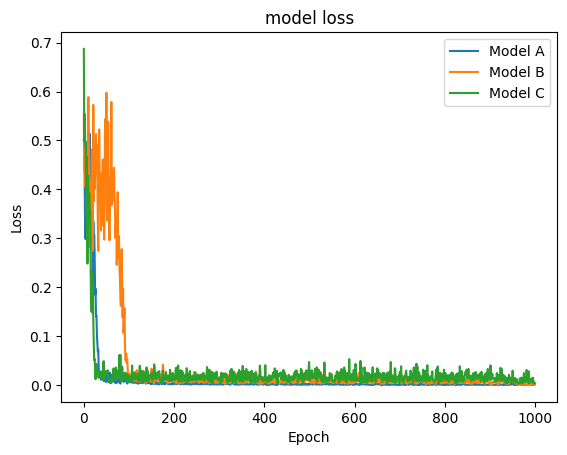

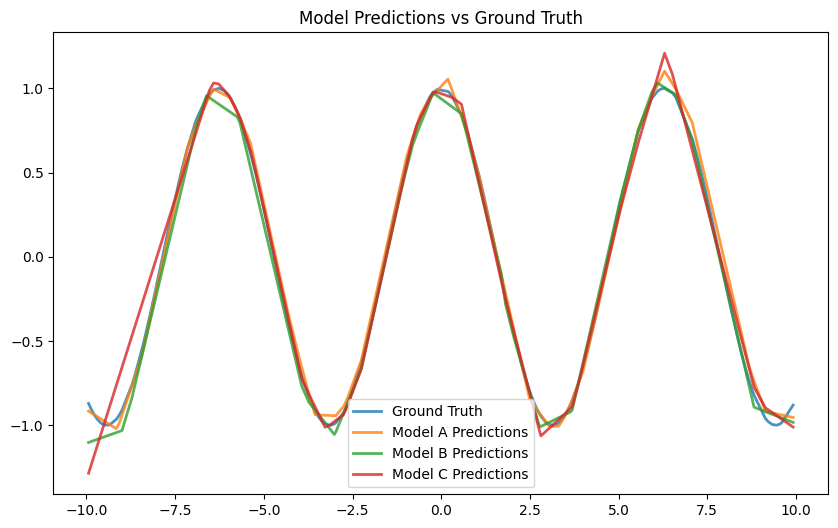

In [ ]:
# Plot training losses
plt.plot(losses_a, label='Model A')
plt.plot(losses_b, label='Model B')
plt.plot(losses_c, label='Model C')
plt.title("model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# # Predictions
# model_a.eval()
# model_b.eval()
# model_c.eval()
# with torch.no_grad():
#     predictions_a = model_a(x_test).numpy()
#     predictions_b = model_b(x_test).numpy()
#     predictions_c = model_c(x_test).numpy()

# # Plot predictions
# plt.scatter(x_test.numpy(), y_test.numpy(), label='Ground Truth', alpha=0.8)
# plt.scatter(x_test.numpy(), predictions_a, label='Model A Predictions', alpha=0.8)
# plt.scatter(x_test.numpy(), predictions_b, label='Model B Predictions', alpha=0.8)
# plt.scatter(x_test.numpy(), predictions_c, label='Model C Predictions', alpha=0.8)
# plt.title("Model Predictions vs Ground Truth")
# plt.legend()
# plt.show()


# Ensure models are evaluated in no_grad context
model_a.eval()
model_b.eval()
model_c.eval()

with torch.no_grad():
    predictions_a = model_a(x_test).numpy()
    predictions_b = model_b(x_test).numpy()
    predictions_c = model_c(x_test).numpy()

# Convert x_test and y_test to numpy if they are not already, and squeeze unnecessary dimensions
x_test_np = np.squeeze(x_test.numpy())
y_test_np = np.squeeze(y_test.numpy())

# Squeeze the predictions as well
predictions_a_squeezed = np.squeeze(predictions_a)
predictions_b_squeezed = np.squeeze(predictions_b)
predictions_c_squeezed = np.squeeze(predictions_c)

# Sort x_test and accordingly sort y_test and predictions
sorted_indices = np.argsort(x_test_np)
x_test_sorted = x_test_np[sorted_indices]
y_test_sorted = y_test_np[sorted_indices]
predictions_a_sorted = predictions_a_squeezed[sorted_indices]
predictions_b_sorted = predictions_b_squeezed[sorted_indices]
predictions_c_sorted = predictions_c_squeezed[sorted_indices]

# Plot sorted data
plt.figure(figsize=(10, 6)) # Adjust the figure size if needed
plt.plot(x_test_sorted, y_test_sorted, label='Ground Truth', alpha=0.8, linewidth=2)
plt.plot(x_test_sorted, predictions_a_sorted, label='Model A Predictions', alpha=0.8, linewidth=2)
plt.plot(x_test_sorted, predictions_b_sorted, label='Model B Predictions', alpha=0.8, linewidth=2)
plt.plot(x_test_sorted, predictions_c_sorted, label='Model C Predictions', alpha=0.8, linewidth=2)

plt.title("Model Predictions vs Ground Truth")
plt.legend()
plt.show()


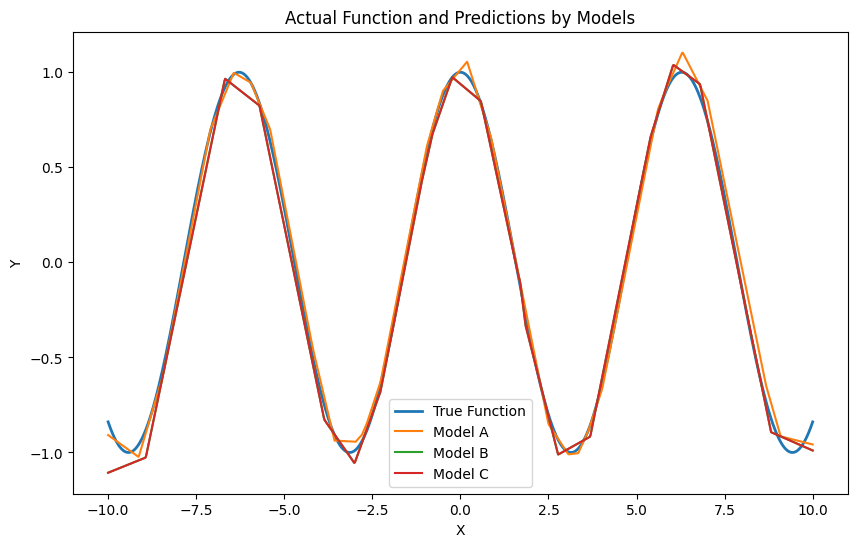

In [ ]:
# Generate true function values
y_true = nonlinear_function(x)

# ... [previous code] ...

# Convert numpy arrays to tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
x_train_tensor = torch.tensor(x_train.numpy(), dtype=torch.float32)

# Plot the actual function and predictions by the models
plt.figure(figsize=(10, 6))
plt.plot(x, y_true, label='True Function', linewidth=2)

# Model A predictions
model_a.eval()
y_pred1 = model_a(x_tensor)
plt.plot(x, y_pred1.detach().numpy(), label='Model A')

# Model B predictions
model_b.eval()
y_pred2 = model_b(x_tensor)
plt.plot(x, y_pred2.detach().numpy(), label='Model B')

y_pred3 = model_c(x_tensor)
plt.plot(x, y_pred2.detach().numpy(), label='Model C')

plt.legend()
plt.title('Actual Function and Predictions by Models')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
